# Exercise 6.7: A chain of resistors

Consider a long chain of resistors.

All the resistors have the same resistance $R$. The power railat the top is at voltage $V_+ = 5$V. The problem is tot find the voltavges $V_1\ldots V_N$ at the internal points in the circuit.

a) Using Ohm's law and the Kirchhoff current law, which says that the total net current flow out of (or into) any junction in a circuit must be zero, show that the voltages $V_1 \ldots V_N$ satisfy the equations:

$$ 3V_1 -V_2 - V_3 = V_+,$$

$$ -V1 + 4V_2 -V3 -V4 = V_+,$$

$$ \vdots$$

$$ -V_{i-2}-V_{i-1}+4V_i -V_{i+1} - V_{i+2} = 0, $$

$$ \vdots$$

$$ -V_{N-3}-V_{N-2}+4V_{N-1} -V_{N} = 0, $$

$$ -V_{N-2}-V_{N-1}+3V_N = 0, $$

Let's start by deriving the first two expressions:

From Kirchhoff we get for $V_1$:

$$ \frac{V_1 - V_+}{R} + \frac{V_1 - V_2}{R} + \frac{V_1 - V_3}{R} = 0 $$

$$ V_1 + V_1 - V_2 + V_1 - V_3 = 3V_1 -V_2 - V_3 = V_+ $$

For $V_2$:

$$ \frac{V_2 - V_+}{R} + \frac{V_2 - V_1}{R} + \frac{V_2 - V_3}{R} + \frac{V_2 - V_4}{R} = 0 $$

$$ V_2 + V_2 - V_1 + V_2 - V_3 + V_2 - V_4 = -V_1 + 4V_2 -V_3 - V_4 = V_+ $$

For $V_3$:

$$ \frac{V_3 - V_1}{R} + \frac{V_3 - V_2}{R} + \frac{V_3 - V_4}{R} + \frac{V_3 - V_5}{R} = 0 $$

$$ -V_1 - V_2 + 4V_3 - V_4 - V_5 = 0 $$

For $V_i$:

$$ \frac{V_i - V_{i-2}}{R} + \frac{V_i - V_{i-1}}{R} + \frac{V_i - V_{i+1}}{R} + \frac{V_i - V_{i+2}}{R} = 0 $$

$$ -V_{i-2} - V_{i-2} + 4V_i - V_{i+1} - V_{i+2} = 0 $$

for $V_{N-1}$:

$$ \frac{V_{N-1} - V_{N-3}}{R} + \frac{V_{N-1} - V_{N-2}}{R} + \frac{V_{N-1} - V_N}{R} = 0 $$

$$ - V_{N-3} -V_{N-2} + 3V_{N-1} - V_N = 0 $$

For $V_N$:

$$ \frac{V_{N} - V_{N-2}}{R} + \frac{V_{N} - V_{N-1}}{R} + \frac{V_{N} - 0}{R} = 0 $$

$$ - V_{N-2} -V_{N-1} + 3V_{N} = 0 $$

These equations result in a banded matrix of 5 wide. with $Av=w$

it will look like:

$$A = \left[\begin{matrix}
3 & -1 & -1 & 0 & 0 & \cdots\\
-1 & 4 & -1 & -1& 0 & \cdots\\
-1 & -1 & 4 & -1& -1 & \cdots\\
0 & -1 & -1 & 4& -1 & \cdots \\
0 & 0 & -1 & -1 & 4 & \cdots \\
\vdots 
\end{matrix}\right]$$

and 
$$ v = \left[\begin{matrix}
                V_+\\
                V_+\\
                0  \\
                0 \\
                \ldots\\
                0\\
                0\\
                \end{matrix}\right]$$

$$ w = \left[\begin{matrix}
        2V_+\\
        3V_+\\
        -2V_+\\
        - V_+\\
        0 \\
        0 \\
        \vdots \\
        0 \\ 
        0
        \end{matrix}\right] $$

b) Write a program to solve for the values of the $V_i$ when there are $N=6$ interal junctions with unknown voltages.

Hint: All the values of $V_i$ should lie between zero and 5V.

In [1]:
import numpy as np
from banded import banded
import matplotlib.pyplot as plt

In [33]:
def construct_matrix(N=6, V_plus=5):
    '''
    Creates the matrix for a chain of resistors of length N
    '''
    A = np.zeros((N,N), float)
    allowed = set(range(N))
    for i in range(N):
        diagonal_val = 4
        if i==0 or i==N-1:
            diagonal_val = 3
        for j in range(i-2, i+3):
            if j in allowed:
                if i==j:
                    A[i,i] =  diagonal_val
                else:
                    A[i,j] = -1
    v = np.zeros(N, float)
    v[0] = V_plus
    v[1] = V_plus
    return A, v

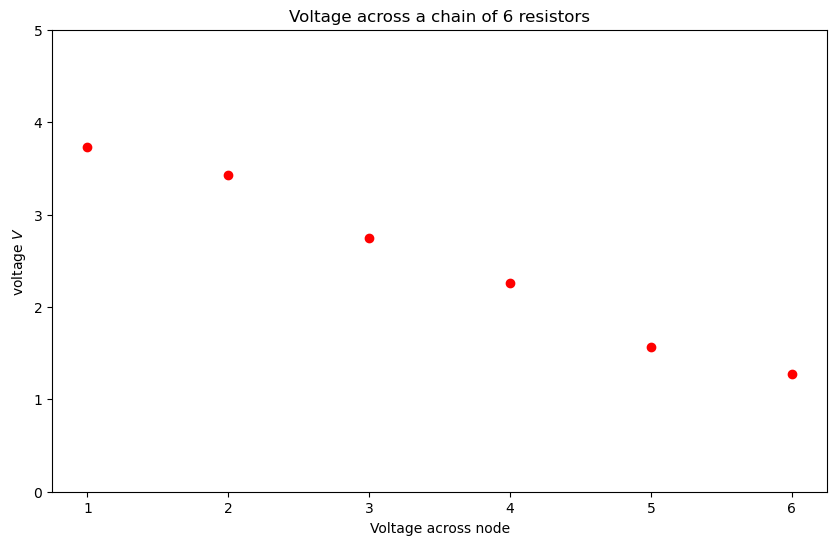

In [42]:
N = 6
V_plus = 5
A, v = construct_matrix(N, V_plus)

x = np.linalg.solve(A,v)

plt.figure(figsize=(10,6))
#plt.plot(range(1,N+1), x)
plt.plot(range(1,N+1), x, 'ro')
plt.title(f"Voltage across a chain of {N} resistors")
plt.xlabel("Voltage across node")
plt.ylabel("voltage $V$")
plt.ylim([0,5])
plt.show()

c) Now repeat your calculation for the case where there are $N=10000$ internal junctions. This part is not possible using standard tools like the solve function. You need to make use of the fact that the matrix A is banded and use the banded function from the file banded.py discussed in Appendix E.

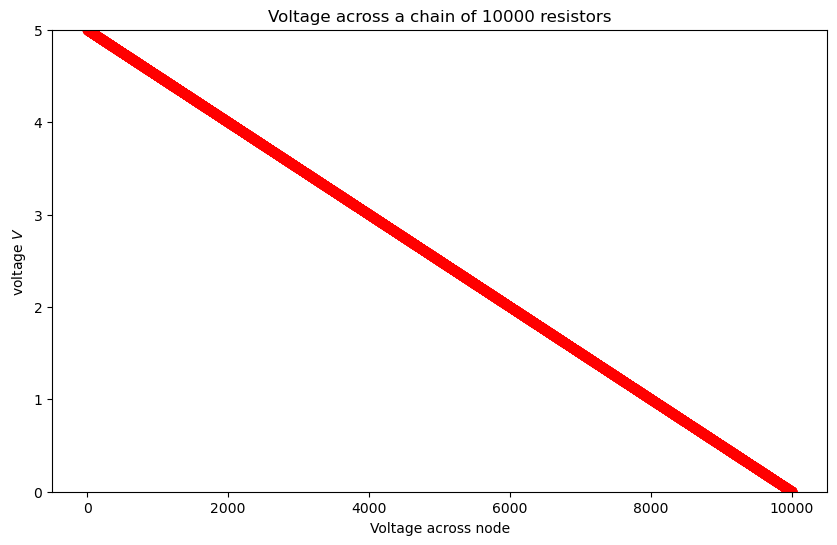

In [35]:
N = 10000
V_plus = 5
A, v = construct_matrix(N, V_plus)

x = np.linalg.solve(A,v)

plt.figure(figsize=(10,6))
#plt.plot(range(1,N+1), x)
plt.plot(range(1,N+1), x, 'ro')
plt.title(f"Voltage across a chain of {N} resistors")
plt.xlabel("Voltage across node")
plt.ylabel("voltage $V$")
plt.ylim([0,5])
plt.show()